# Breast Cancer Wisconsin (Diagnostic) Data Set

Source:

Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor:

Nick Street



## Data Set Information:

#### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

- Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

- The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/



In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
b_cancer = load_breast_cancer(as_frame=True)
type(b_cancer)

sklearn.utils.Bunch

In [4]:
b_cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [5]:
features=b_cancer['data']
target=b_cancer['target']
feature_names=b_cancer['feature_names']

In [6]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [9]:
target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [10]:
357/212

1.6839622641509433

조직 검사를 통해 얻은 특징량으로부터

## 유방암 진단하기

특징량 알아보기

Attribute Information:

1) ID number


2) Diagnosis (M = malignant(악성), B = benign(양성))
3-32)

Ten real-valued features are computed for each cell nucleus:

> a) radius (mean of distances from center to points on the perimeter)

  > b) texture (standard deviation of * gray-scale values)
  *gray-scale: 명도차 만을 갖는 픽셀의 값
  
  > c) perimeter: 2.둘레(무엇의 가장자리를 한 번 도는 길이) (→circumference)
  
  
 >  d) area
 
 
 >  e) smoothness (local variation in radius lengths)  
 > - In the common case, smoothness is a function of the color gradients. Take a 2d gradient on the 3 color channels, then take their magnitude, sqrt(dx^2 + dy^2) and average, sum or some function over the 3 channels. That can give you local smoothness which you can then sum/average/least squares over the image.
 
 
  > f) compactness (perimeter^2 / area - 1.0)
  
  
  > g) concavity (severity of concave portions of the 
contour) : 윤곽선상에서 오목하게 들어간 정도


>   h) concave points (number of concave portions of the contour) 윤곽이 오목하게 들어간 갯수


 >  i) symmetry 대칭성
 
 
 >  j) fractal dimension ("coastline approximation" - 1) 치수가 낮을수록 coastline이 직선적이고,
 높을수록 들쭉날쭉하다.

### 악성/양성(0/1) 판정이므로 결정트리구조를 모델로 사용.

### 악성/양성(0/1) 각 판정 별 특징량 


In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

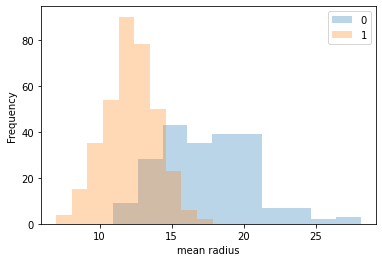

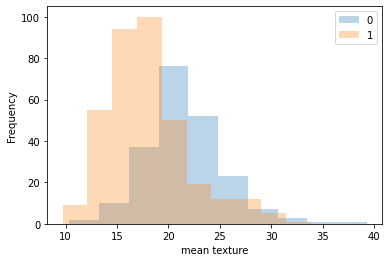

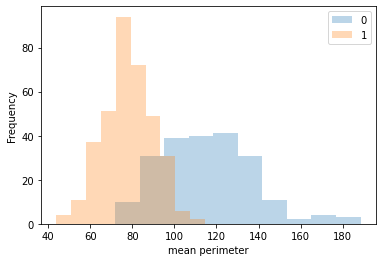

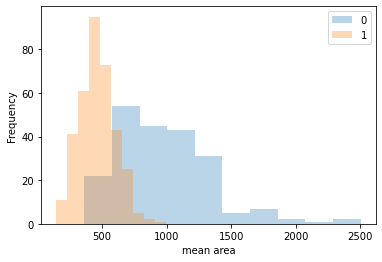

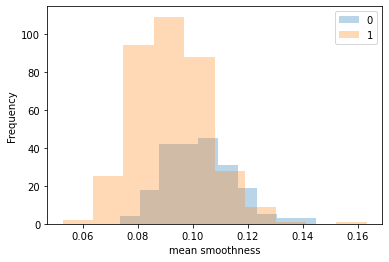

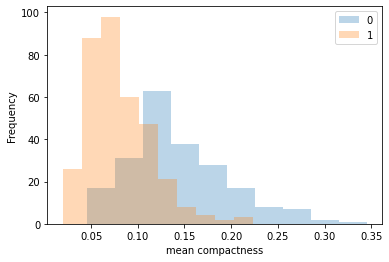

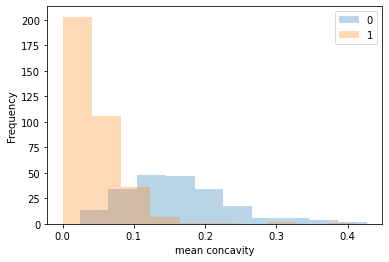

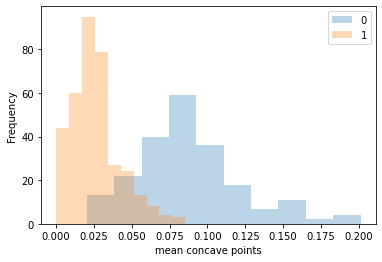

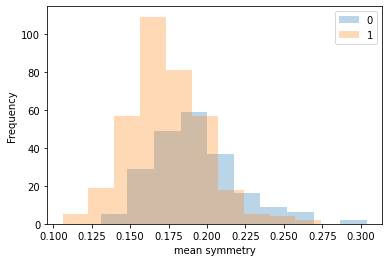

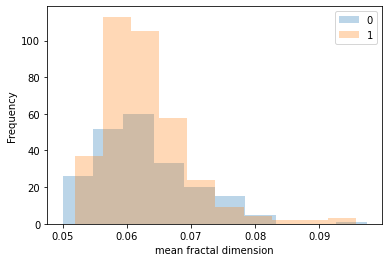

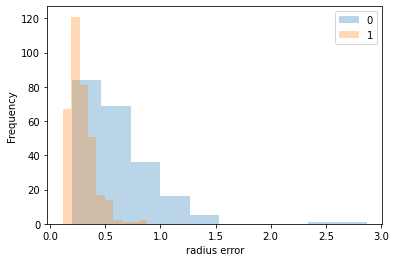

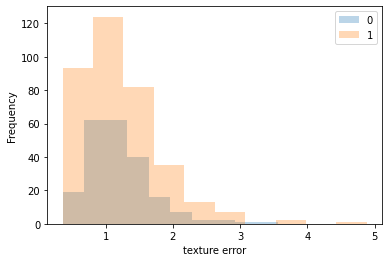

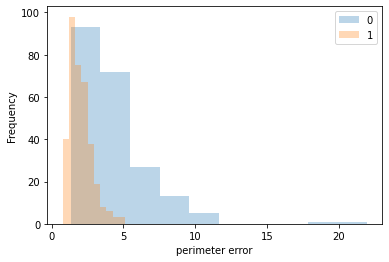

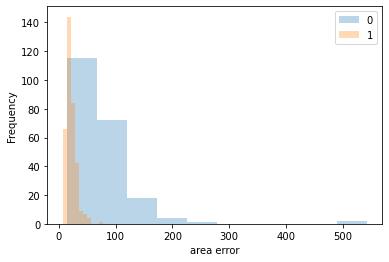

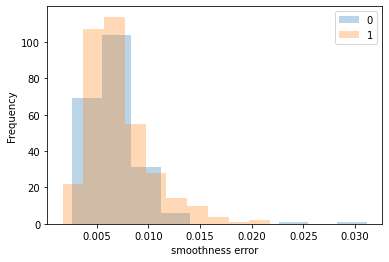

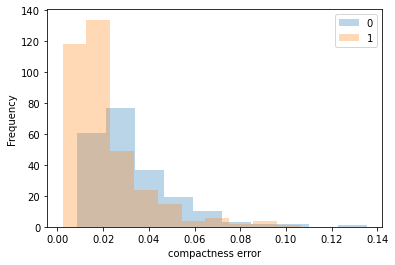

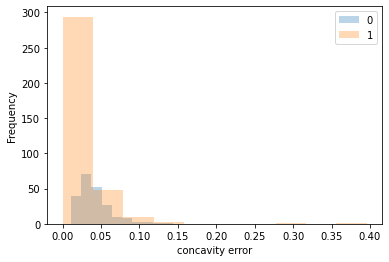

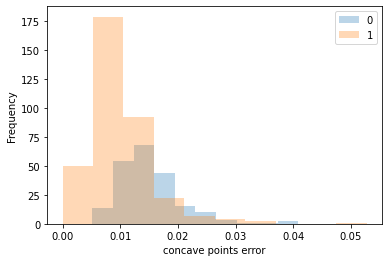

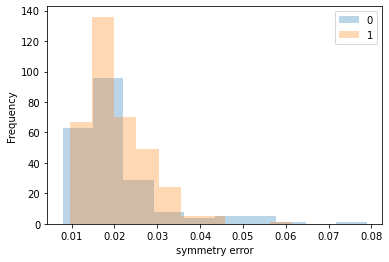

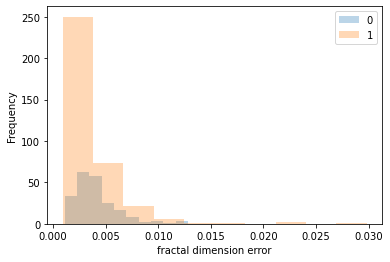

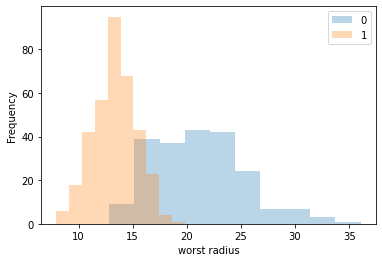

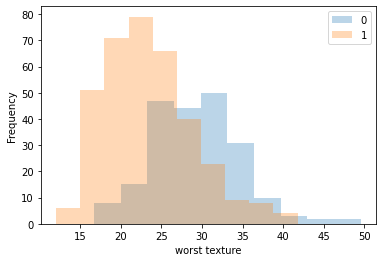

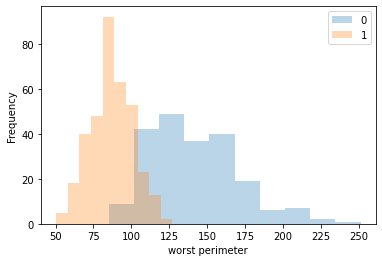

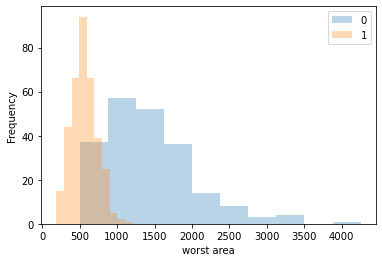

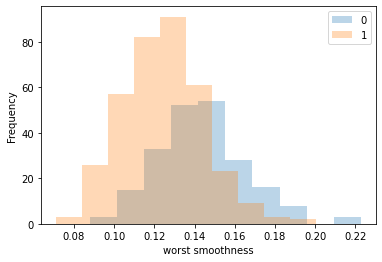

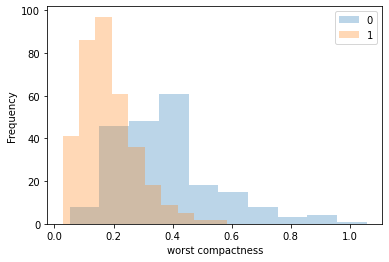

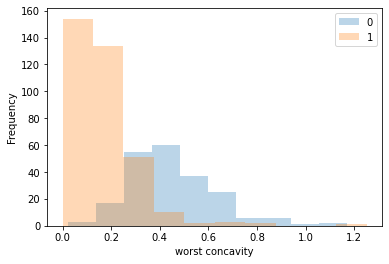

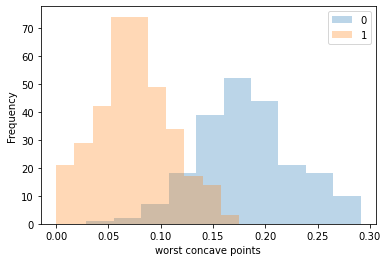

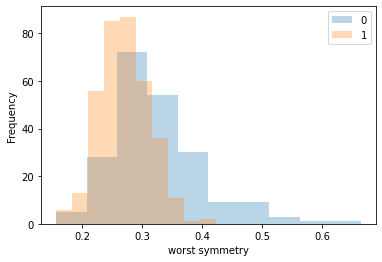

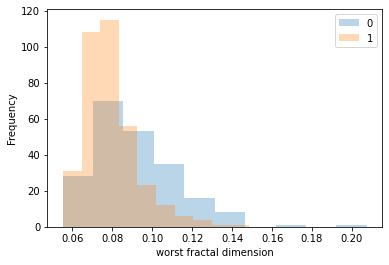

In [13]:
# 모든 판정 히스토그램
for feat in b_cancer['feature_names']:
    n_d2=b_cancer['target']
    a2=[[],[]]
    x2=n_d2.count()
    for i2 in range(0,2): #0은 악성, 1은 양성
        for j in range(0,x2):
            if(n_d2[j]==i2):
                a2[i2].append(j)
        features_=b_cancer['data'].loc[a2[i2],feature_names]
        features_[feat].plot(kind='hist',bins=10, label=i2,alpha=0.3)
    
    plt.legend()
    plt.xlabel(feat)
    plt.show()

In [14]:
n_d2.count()

569

In [15]:
#mean texture, mean smoothness, mean symmetry, mean fracal dimension 는 제외하겠다!

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split

#### 불균형 데이터였음을 이전에 확인했었다.
양성 데이터에 비해 악성 데이터가 1.6배이상 많았다.

#### 결손값 확인

In [17]:
features.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### 결손값 없음

#### 특징량 x리스트 만들기

In [18]:
col=features.iloc[:,:10]
col

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [19]:
#그 전에 제외할 열들
#mean texture(?), mean smoothness, mean symmetry, mean fracal dimension 는 제외하겠다!

In [20]:
col2=col.loc[:,['mean radius', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points'
              ]]

In [21]:
col2

,mean radius,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points
0,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710
1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017
2,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790
3,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520
4,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430
...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11100,0.11590,0.24390,0.13890
565,20.13,131.20,1261.0,0.09780,0.10340,0.14400,0.09791
566,16.60,108.30,858.1,0.08455,0.10230,0.09251,0.05302
567,20.60,140.10,1265.0,0.11780,0.27700,0.35140,0.15200


#### 훈련데이터와 테스트 데이터의 분할

In [22]:
x2=col2
t=b_cancer['frame']['target']

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x2,t,test_size=0.3, random_state=0)
x_train.shape

(398, 7)

In [24]:
model= tree.DecisionTreeClassifier(max_depth=10, random_state=0,
                                  class_weight='balanced')
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [25]:
model.score(X=x_test, y=y_test)

0.9181286549707602

### 특징량 데이터에서 제외한 열이 없었으면?

In [26]:
x=col
t=b_cancer['frame']['target']

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,t,test_size=0.3, random_state=0)
x_train.shape

(398, 10)

#### 불균형 데이터 고려

In [28]:
model= tree.DecisionTreeClassifier(max_depth=10, random_state=0,
                                  class_weight='balanced')
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [29]:
model.score(X=x_test, y=y_test)

0.935672514619883

- 전체 특징량 열을 사용해 학습했을 때: 0.935672514619883


- mean texture, mean smoothness, mean symmetry, mean fracal dimension 는 제외: 0.9181286549707602

#### 애매했던 texture을 넣기.

In [30]:
col2=col.loc[:,['mean texture','mean radius', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points'
              ]]
x2=col2
t=b_cancer['frame']['target']
x_train, x_test, y_train, y_test=train_test_split(x2,t,test_size=0.3, random_state=0)
model= tree.DecisionTreeClassifier(max_depth=10, random_state=0,
                                  class_weight='balanced')
model.fit(x_train, y_train)
model.score(X=x_test, y=y_test)

0.935672514619883

#### 0.935672514619883로 전체 특징량을 학습시켰을 때와 같은 정답률을 보인다.

### 트리의 깊이를 바꿔보자

In [31]:
max_depth=0
max_score=0
for i in range(1,101):
    model= tree.DecisionTreeClassifier(max_depth=i, random_state=0,
                                  class_weight='balanced')
    model.fit(x_train, y_train)

    sc=model.score(X=x_test, y=y_test)
    if(sc>max_score):
        max_depth=i
        max_score=sc
print(f"1~100 깊이 중 \n가장 높은 스코어: {max_score} \n그때의 깊이: {max_depth}")

1~100 깊이 중 
가장 높은 스코어: 0.9415204678362573 
그때의 깊이: 6


In [32]:
model= tree.DecisionTreeClassifier(max_depth=6, random_state=0,
                                  class_weight='balanced')
model.fit(x_train, y_train)

model.score(X=x_test, y=y_test)

0.9415204678362573

### 특징량 중요도

In [33]:
model.feature_importances_

array([0.09589486, 0.00101372, 0.01709255, 0.04307163, 0.02194431,
       0.01026416, 0.008324  , 0.80239479])

In [34]:
pd.DataFrame(model.feature_importances_, index=x2.columns)

,0
mean texture,0.095895
mean radius,0.001014
mean perimeter,0.017093
mean area,0.043072
mean smoothness,0.021944
mean compactness,0.010264
mean concavity,0.008324
mean concave points,0.802395


mean concave points가 악성/양성(0/1)을 분류하는데 미치는 영향이 가장 크다.

___

In [35]:
a2=model.tree_.feature
print(a2)
a3=list(a2)
for i in range(0,8):
    print("%d : %d" %(i,a3.count(i)))

[ 7  3  7  5  7  0 -2 -2 -2  6 -2 -2  0 -2 -2  0 -2 -2  0  7  0 -2 -2 -2
  2  4 -2  5 -2 -2  6  0  4 -2 -2 -2  0  3 -2 -2  1 -2 -2]
0 : 7
1 : 1
2 : 1
3 : 2
4 : 2
5 : 2
6 : 2
7 : 4


In [36]:
a4=model.tree_.threshold
a4

array([ 4.89200000e-02,  6.94149994e+02,  4.47000004e-02,  6.30900003e-02,
        3.34450006e-02,  2.14949999e+01, -2.00000000e+00, -2.00000000e+00,
       -2.00000000e+00,  2.51249992e-03, -2.00000000e+00, -2.00000000e+00,
        2.47100000e+01, -2.00000000e+00, -2.00000000e+00,  2.01550007e+01,
       -2.00000000e+00, -2.00000000e+00,  1.41199999e+01,  1.08740002e-01,
        1.10850000e+01, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        8.33300018e+01,  1.08350001e-01, -2.00000000e+00,  9.69499983e-02,
       -2.00000000e+00, -2.00000000e+00,  6.88700005e-02,  2.02599993e+01,
        9.73350033e-02, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        1.63949995e+01,  6.89450012e+02, -2.00000000e+00, -2.00000000e+00,
        1.44150000e+01, -2.00000000e+00, -2.00000000e+00])

In [37]:
def when_decnode(i):
    max_indx=0
    max_v=0
    mod=model.tree_.value[i]
    for j in range(0,2):
        if(mod[0][j]>max_v):
            max_v=mod[0][j]
            max_indx=j
    return max_indx        

In [38]:
for i in range(0,len(list(a4))):
    if(a4[i]==-2):
        print("\n>>%d번째 분기,\n%s에 관한 조건: %s" %(i,x_train.columns[a3[i]],'None'))
        k=when_decnode(i)
        s=[]
        if(k==0):
            s="악성(0)"
        else:
            s="양성(1)"
        print("    판정노드: %s"%s)
    else:
        print("\n>>%d번째 분기,\n%s에 관한 조건: %f" %(i,x_train.columns[a3[i]],a4[i]))
        print(model.tree_.value[i][0])


>>0번째 분기,
mean concave points에 관한 조건: 0.048920
[199. 199.]

>>1번째 분기,
mean area에 관한 조건: 694.149994
[ 14.69127517 183.81526104]

>>2번째 분기,
mean concave points에 관한 조건: 0.044700
[  8.01342282 179.81927711]

>>3번째 분기,
mean compactness에 관한 조건: 0.063090
[  5.34228188 174.2248996 ]

>>4번째 분기,
mean concave points에 관한 조건: 0.033445
[ 5.34228188 63.13654618]

>>5번째 분기,
mean texture에 관한 조건: 21.495000
[ 2.67114094 63.13654618]

>>6번째 분기,
mean concavity에 관한 조건: None
    판정노드: 양성(1)

>>7번째 분기,
mean concavity에 관한 조건: None
    판정노드: 양성(1)

>>8번째 분기,
mean concavity에 관한 조건: None
    판정노드: 악성(0)

>>9번째 분기,
mean concavity에 관한 조건: 0.002512
[  0.         111.08835341]

>>10번째 분기,
mean concavity에 관한 조건: None
    판정노드: 양성(1)

>>11번째 분기,
mean concavity에 관한 조건: None
    판정노드: 양성(1)

>>12번째 분기,
mean texture에 관한 조건: 24.710000
[2.67114094 5.59437751]

>>13번째 분기,
mean concavity에 관한 조건: None
    판정노드: 양성(1)

>>14번째 분기,
mean concavity에 관한 조건: None
    판정노드: 악성(0)

>>15번째 분기,
mean texture에 관한 조건: 20.155001
[6.67785235

In [39]:
x_train.columns=['mean texture','mean radius', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points'
              ]

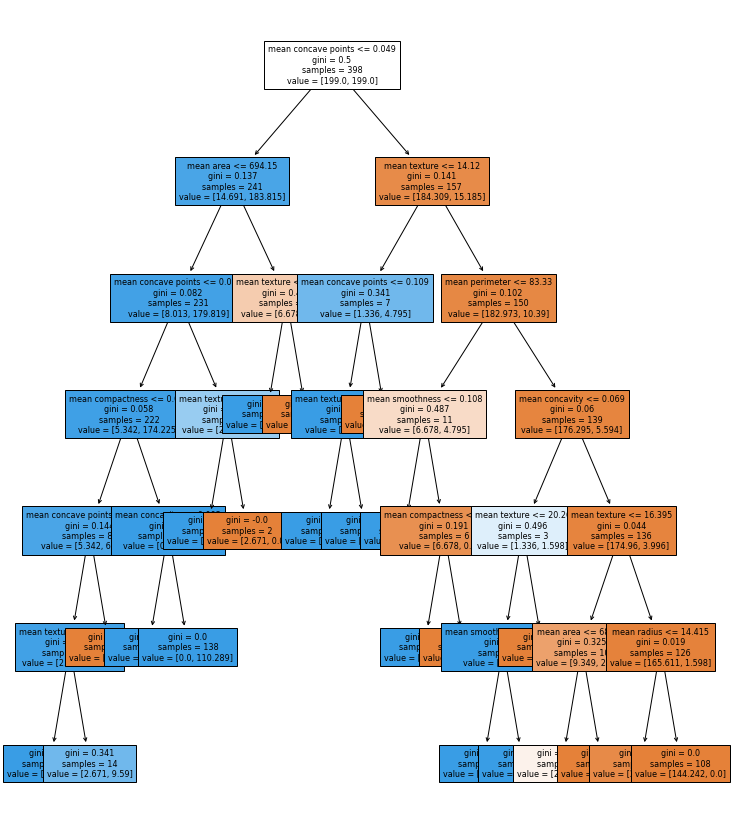

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,15))
tree.plot_tree(model, feature_names=x_train.columns, filled=True,fontsize=8)
plt.show()